In [ ]:
!pip  install langchain langchain-community langchainhub chromadb bs4 sentence_transformers pypdf
!pip install langchain
!pip install openai
!pip install langchain-huggingface
!pip install huggingface_hub
!pip install transformers
!pip install accelerate
!pip install  bitsandbytes
!pip install langchain-community langchain-core
!pip install --upgrade langchain
!pip install py-readability-metrics

import bs4
from langchain import hub
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.document_loaders import BSHTMLLoader
from langchain_community.vectorstores import Chroma
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.llms.huggingface_pipeline import HuggingFacePipeline
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_core.prompts import PromptTemplate
import pandas as pd
import string
from langchain.docstore.document import Document
import os
from langchain_huggingface import HuggingFacePipeline
from langchain_huggingface import HuggingFaceEndpoint
import re
from tqdm import tqdm
from sentence_transformers import SentenceTransformer, util
import torch
from langchain_community.vectorstores import Chroma

import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, AutoConfig, pipeline
from huggingface_hub import login
from readability import Readability
import numpy as np
import matplotlib.pyplot as plt

sec_key = ""
os.environ["HUGGINGFACEHUB_API_TOKEN"]=sec_key

repo_id="mistralai/Mistral-7B-Instruct-v0.2"


In [ ]:


llm=HuggingFaceEndpoint(repo_id=repo_id,max_length=2048,temperature=0.1,token=sec_key)

embeddings = HuggingFaceEmbeddings()

                    max_length was transferred to model_kwargs.
                    Please make sure that max_length is what you intended.
                    token was transferred to model_kwargs.
                    Please make sure that token is what you intended.
<ipython-input-2-b164ece3c789>:3: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings()
<ipython-input-2-b164ece3c789>:3: LangChainDeprecationWarning: Default values for HuggingFaceEmbeddings.model_name were deprecated in LangChain 0.2.16 and will be removed in 0.4.0. Explicitly pass a model_name to the HuggingFaceEmbeddings constructor instead.
  embeddings = H

In [ ]:
df = pd.read_csv("/content/final-data-test-v2.csv")

# df.head(1)

# first_10_rows = df.head(2)
# last_10_rows = df.tail(2)


# df = pd.concat([first_10_rows, last_10_rows])

# df = df.head(4)

pdfs_names = list(df["pdf names"])

pdfs_names

text = list(df["text"])
len(text)


93

In [ ]:
pdfs_names

['max_life_smart_secure_plus_plan_prospectus_147c9617eb.pdf',
 'smart_term_plan_prospectus_f719c98aba.pdf',
 'smart_term_plan_prospectus_f719c98aba.pdf',
 'max_life_smart_secure_plus_plan_prospectus_147c9617eb.pdf',
 'smart_term_plan_prospectus_f719c98aba.pdf',
 'max_life_online_term_plan_plus_prospectus_72e220c5b0 (1).pdf',
 'smart_term_plan_prospectus_f719c98aba.pdf',
 'max_life_super_term_plan_prospectus_03b6c799bd.pdf',
 'max_life_smart_secure_plus_plan_prospectus_147c9617eb.pdf',
 'max_life_super_term_plan_prospectus_03b6c799bd.pdf',
 'max_life_online_term_plan_plus_prospectus_72e220c5b0 (1).pdf',
 'smart_term_plan_prospectus_f719c98aba.pdf',
 'premium_return_protection_plan_prospectus_bfce1081e0.pdf',
 'smart_term_plan_prospectus_f719c98aba.pdf',
 'premium_return_protection_plan_prospectus_bfce1081e0.pdf',
 'max_life_smart_secure_plus_plan_prospectus_147c9617eb.pdf',
 'smart_term_plan_prospectus_f719c98aba.pdf',
 'max_life_online_term_plan_plus_prospectus_72e220c5b0 (1).pdf',
 'm

In [ ]:
df.head(1)

,pdf names,text,Conditional Clauses,Cross-Dependent Clauses,Legal Terminology,Ambiguity in Expression,Interpretable
0,max_life_smart_secure_plus_plan_prospectus_147...,Product Name: Max Life Smart Secure Plus Plan ...,1,0,1,0,0


In [ ]:
df.columns

Index(['pdf names', 'text', 'Conditional Clauses', 'Cross-Dependent Clauses',
       'Legal Terminology', 'Ambiguity in Expression', 'Interpretable'],
      dtype='object')

In [ ]:
'pdf names', 'text', 'Conditional Clauses', 'Cross-Dependent Clauses','Legal Terminology', 'Ambiguity in Expression', 'Interpretable'

('pdf names',
 'text',
 'Conditional Clauses',
 'Cross-Dependent Clauses',
 'Legal Terminology',
 'Ambiguity in Expression',
 'Interpretable')

In [ ]:
text = []
category_array = []


categories = ['Conditional Clauses', 'Cross-Dependent Clauses', 'Legal Terminology', 'Ambiguity in Expression', 'Interpretable']


for _, row in df.iterrows():
    # Text for the current row
    text_ = row['text']

    # List to store the categories where the value is 1
    temp_categories = []

    # Check for each category column and if value is 1, add the category to temp_categories
    for category in categories:
        if row[category] == 1:
            temp_categories.append(category)

    # Append the text and corresponding categories to the respective arrays
    text.append(text_)
    category_array.append(temp_categories)

# Display the result
print("Text Array:", text)
print("Category Array:", category_array)

Text Array: ["Product Name: Max Life Smart Secure Plus Plan  \n \n  Page 28 of 40 \n \nSection F - Annexures \nAnnexure 1 – Critical Illness Definitions & Exclusion \nACI Benefit - Definitions and Exclusions \nBelow table provides the list of critical illnesses covered: \n1. Cancer of specified severity Cancer 21. Alzheimer's Disease \n2. Angioplasty* 22. Motor Neurone Disease with Permanent Symptoms \n3. First Heart Attack – of Specified Severity 23. Multiple Sclerosis with Persisting Symptoms \n4. Open Heart Replacement or Repair of Heart Valves 24. Muscular Dystrophy \n5. Surgery to aorta Heart and Artery Benefit 25. Parkinson’s Disease \n6. Cardiomyopathy 26. Loss of Independent Existence \n7. Primary Pulmonary hypertension 27. Loss of Limbs \n8. Open Chest CABG 28.  Deafness \n9. Blindness 29. Loss of Speech Others \n10. End Stage Lung Failure 30. Medullary Cystic Disease \n11. End Stage Liver Failure  31. Systematic lupus Eryth with Renal Involvement \n12. Kidney Failure Requirin

In [ ]:
# def generate_prompt(policy_sentence):
#     return f"""
# You are a legal expert tasked with improving the clarity and specificity of policy document sentences. When provided with an input sentence, your goal is to identify potential ambiguities, missing details, or generalities in the text. Based on your analysis, generate exactly 3–4 of the most relevant and helpful clarification questions to remove ambiguity and ensure the sentence is clear and precise.

# Process:
# 1. Carefully read and understand the input sentence.
# 2. Identify the most important aspects that may lead to confusion, vagueness, or misinterpretation.
# 3. Formulate a maximum of 3–4 targeted clarification questions that will help resolve these issues and make the sentence clearer.

# ### Input: {policy_sentence}

# ### Output Format:
# - The output must strictly follow this pattern:
#     - "Clarification Question 1"
#     - "Clarification Question 2"
#     - "Clarification Question 3"
#     - "Clarification Question 4" (if applicable, but no more than 4)
# """

def extract_questions(text, k = 4):
    # Use regex to match the question text, considering both formats with or without dashes
    questions = re.findall(r'[-]?\s*(.*?)(?=\?)\?', text)

    # Ensure all questions end with a question mark and return a clean list
    return [question.strip() + '?' for question in questions][:k]

In [ ]:
def generate_prompt(policy_sentence: str, categories: list[str]) -> str:
    category_descriptions = "\n".join(
        [f"    {i + 1}. **{category}**" for i, category in enumerate(categories)]
    )
    return f"""
You are a legal expert tasked with improving the clarity and specificity of policy document sentences. Your goal is to identify potential ambiguities, missing details, or generalities in the sentence, particularly focusing on specific areas of misinterpretation as outlined in the given categories.



When provided with an input sentence, analyze it carefully to determine which category or categories apply. Then, generate exactly 3–4 clarification questions that target these specific areas of ambiguity, ensuring they are as helpful and relevant as possible to remove misinterpretation and improve the sentence's clarity.

### Input:
Policy Sentence: {policy_sentence}
Categories: {', '.join(categories)}

### Process:
1. Read the input policy sentence and reference the given categories for types of potential misinterpretations.
2. Identify which category or categories apply to the input sentence.
3. Based on the identified categories, formulate clarification questions that address potential ambiguities, vague terms, or unclear cross-references.
4. Limit your output to a maximum of 4 highly targeted questions.

### Output Format:
- The output must strictly follow this pattern:
    - "Clarification Question 1"
    - "Clarification Question 2"
    - "Clarification Question 3"
    - "Clarification Question 4" (if applicable, but no more than 4)

Use the structure and categories to ensure your questions are targeted, relevant, and actionable.
"""

In [ ]:
cqs = []
for t,c in tqdm(zip(text, category_array)):

    t2 = generate_prompt(t,c)

    ans = llm.invoke(t2)

    ans = extract_questions(ans)

    cqs.append(ans)

93it [05:30,  3.55s/it]


In [ ]:
print(len(cqs))

93


In [ ]:
Chuck_Size = 1200
Chunk_Overlap = 200
K_ = 5

base = "/content/data/"

In [ ]:
def generate_prompt2(question, retrieved_context):
    return f"""
You are a legal expert. Below is a legal question followed by relevant retrieved context. To answer the question, please follow these steps:

1. Carefully read the question and identify the key legal issue(s) being asked.
2. Review the retrieved context thoroughly. Ensure you understand the legal concepts, principles, and facts presented in the context.
3. Based on your legal expertise, synthesize the information from the context to formulate a precise answer that directly addresses the question.
4. Ensure your answer is legally sound, clear, and accurate. If the context contains gaps or ambiguities, note them and explain how they might impact your answer.

---

Question:
{question}

Retrieved Context:
{retrieved_context}

---

Answer:
"""

ANS = []
QUESTION = []
TEXT = []
base = "/content/data/"
vectorstore_cache = {}


for q_, t_, p_ in tqdm(zip(cqs, text, pdfs_names)):

    ans_temp = []
    q_temp = []


    pdf_name = os.path.splitext(p_)[0]


    if pdf_name not in vectorstore_cache:

        path = os.path.join(base, p_)


        loader = PyPDFLoader(path)
        docs = loader.load()

        text_splitter = RecursiveCharacterTextSplitter(chunk_size=Chuck_Size, chunk_overlap=Chunk_Overlap, add_start_index=True)
        splits = text_splitter.split_documents(docs)


        vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)
        vectorstore_cache[pdf_name] = vectorstore
    else:

        vectorstore = vectorstore_cache[pdf_name]


    retriever = vectorstore.as_retriever(search_kwargs={"k": K_})


    for q in tqdm(q_):


        r_doc_ = retriever.invoke(q)
        r_doc = [r.page_content for r in r_doc_]


        r_doc = [ "#Context " + str(i+1) + ": " + r_doc[i] for i in range(len(r_doc))]
        context_string = "\n".join(r_doc)


        p = generate_prompt2(q, context_string)
        ans = llm.invoke(p)


        ans_temp.append(ans)
        q_temp.append(q)


    TEXT.append(t_)
    ANS.append(ans_temp)
    QUESTION.append(q_temp)



0it [00:00, ?it/s]
100%|██████████| 4/4 [00:22<00:00,  5.51s/it]
1it [03:15, 195.56s/it]
100%|██████████| 4/4 [00:14<00:00,  3.53s/it]
2it [05:56, 175.19s/it]
100%|██████████| 4/4 [00:16<00:00,  4.13s/it]
3it [06:13, 102.74s/it]
100%|██████████| 4/4 [00:14<00:00,  3.69s/it]
4it [06:27, 68.01s/it] 
100%|██████████| 4/4 [00:09<00:00,  2.33s/it]
5it [06:37, 46.85s/it]
100%|██████████| 4/4 [00:11<00:00,  2.84s/it]
6it [08:14, 64.07s/it]
100%|██████████| 4/4 [00:15<00:00,  3.94s/it]
7it [08:30, 48.28s/it]
100%|██████████| 4/4 [00:13<00:00,  3.31s/it]
8it [09:21, 49.19s/it]
100%|██████████| 4/4 [00:13<00:00,  3.43s/it]
9it [09:35, 38.11s/it]
100%|██████████| 4/4 [00:14<00:00,  3.53s/it]
10it [09:49, 30.71s/it]
100%|██████████| 4/4 [00:13<00:00,  3.31s/it]
11it [10:02, 25.37s/it]
100%|██████████| 4/4 [00:12<00:00,  3.12s/it]
12it [10:15, 21.45s/it]
100%|██████████| 4/4 [00:15<00:00,  3.89s/it]
13it [11:12, 32.19s/it]
100%|██████████| 4/4 [00:14<00:00,  3.71s/it]
14it [11:26, 26.96s/it]
100%|█

In [ ]:

def generate_rectification_prompt(input_1, input_2, input_3):
    """
    This function generates a prompt for a large language model (LLM) to rectify a potentially misinterpreted policy paragraph
    using the clarification questions and their answers, which are provided as lists of strings.

    Args:
    - input_1 (str): The potentially misinterpreted policy paragraph.
    - input_2 (list[str]): A list of clarification questions.
    - input_3 (list[str]): A list of clarification answers.

    Returns:
    - str: The generated prompt for rectification.
    """

    # Start building the prompt
    prompt = f"""
**Task:** You are a legal expert, and you are provided with a potentially misinterpreted paragraph extracted from a policy document. Additionally, you will receive a set of clarification questions along with the answers to those questions, which are designed to help guide your understanding of the paragraph. Your task is to use these inputs to rectify the paragraph, ensuring that the final output accurately reflects the original policy intent, without misinterpretations or ambiguities.

**Inputs:**
1. **Potentially Misinterpreted Paragraph (Input 1):**
   {input_1}

2. **Clarification Questions and Answers (Input 2 & Input 3):**
"""

    # Add clarification questions and answers
    for idx, (question, answer) in enumerate(zip(input_2, input_3), start=1):
        prompt += f"""
   - **Clarification Question {idx}:**
     {question}
   - **Clarification Answer {idx}:**
     {answer}
"""

    # Add task instructions and output section
    prompt += f"""
**Task Instructions:**
- Using the clarification questions and their answers, carefully analyze the potentially misinterpreted paragraph.
- Rectify the paragraph to make sure it conveys the intended meaning with clarity, aligning it with the context provided in the clarification answers.
- Ensure that the rectified paragraph maintains accuracy, is free of ambiguity, and reflects the true policy intent.

**Output:**
A rectified version of the potentially misinterpreted paragraph, corrected based on the clarification inputs provided.
"""

    return prompt


In [ ]:
R_Text = []
Text = []
for t,a,q in tqdm(zip(TEXT,ANS,QUESTION)):



    text = generate_rectification_prompt(t, q, a)

    ans = llm.invoke(text)

    R_Text.append(ans)
    Text.append(t)

def summarize_legal_paragraph(input_paragraph):
    prompt = f"""
    You are given a paragraph from a legal policy document. Your task is to summarize it while preserving the essential meaning and important details. Follow these steps:

    1. **Understand the core message**: Read the paragraph carefully and identify the main provisions, rights, obligations, and conditions.
    2. **Highlight key legal terms**: Focus on any specific legal terms, dates, or actions that are crucial to the policy.
    3. **Eliminate unnecessary details**: Remove any extraneous information that doesn’t affect the main points or legal implications.
    4. **Keep it clear and concise**: Summarize the paragraph in simple, straightforward language while retaining the original meaning and intent.
    5. **Ensure accuracy**: Double-check that all essential details are included and that the summary accurately reflects the original content.

    The paragraph to summarize is as follows:

    "{input_paragraph}"

    Provide the summary below:
    """
    return prompt

S_Text = []
for t in tqdm(R_Text):

    text = summarize_legal_paragraph(t)

    ans = llm.invoke(text)
    S_Text.append(ans)

93it [09:53,  6.38s/it]
100%|██████████| 93/93 [04:18<00:00,  2.78s/it]


In [ ]:
for i in range(len(pdfs_names)):

    print(len(Text[i]),len(R_Text[i]), len(S_Text[i]))

1160 1972 1447
625 1014 413
1090 1873 1260
1187 2079 855
1171 1950 1277
1111 1156 682
1148 2213 1133
220 2070 722
1188 1905 773
133 1061 782
1185 771 546
1132 647 562
1191 2215 1109
1176 3566 669
1171 893 597
1104 1594 809
1104 2310 605
1170 1683 412
1165 2255 938
1123 2495 926
1115 816 482
1176 2311 722
1107 1526 472
1166 761 265
942 1871 1120
1174 1016 553
1146 2462 1734
427 407 314
414 1498 703
1162 1243 624
1162 1594 811
1187 1395 729
1188 2070 652
469 1896 919
1134 2308 889
1150 1961 1301
1111 1653 803
825 1911 956
1099 2122 1224
1196 1837 934
1194 1581 696
1079 984 468
327 1271 596
203 670 522
1126 1566 966
1179 1671 814
199 2443 1095
967 1409 767
1079 1719 932
1149 1608 855
1083 1267 994
1022 1559 686
1159 2151 1327
1092 1060 812
1043 1546 583
1195 2245 677
1021 2283 693
1177 2268 913
631 899 748
206 989 504
362 1372 652
528 929 638
1087 953 676
1165 1162 403
1197 1613 537
1132 1932 560
955 1387 1065
1118 1910 646
976 1693 1240
1131 2091 678
1081 2006 818
1096 630 474
1086 1727 

In [ ]:
i = 0

In [ ]:
Text[i]

"Product Name: Max Life Smart Secure Plus Plan  \n \n  Page 28 of 40 \n \nSection F - Annexures \nAnnexure 1 – Critical Illness Definitions & Exclusion \nACI Benefit - Definitions and Exclusions \nBelow table provides the list of critical illnesses covered: \n1. Cancer of specified severity Cancer 21. Alzheimer's Disease \n2. Angioplasty* 22. Motor Neurone Disease with Permanent Symptoms \n3. First Heart Attack – of Specified Severity 23. Multiple Sclerosis with Persisting Symptoms \n4. Open Heart Replacement or Repair of Heart Valves 24. Muscular Dystrophy \n5. Surgery to aorta Heart and Artery Benefit 25. Parkinson’s Disease \n6. Cardiomyopathy 26. Loss of Independent Existence \n7. Primary Pulmonary hypertension 27. Loss of Limbs \n8. Open Chest CABG 28.  Deafness \n9. Blindness 29. Loss of Speech Others \n10. End Stage Lung Failure 30. Medullary Cystic Disease \n11. End Stage Liver Failure  31. Systematic lupus Eryth with Renal Involvement \n12. Kidney Failure Requiring Regular Dia

In [ ]:
R_Text[i]

'\nProduct Name: Max Life Smart Secure Plus Plan\n\nPage 28 of 40\n\nSection F - Annexures\nAnnexure 1 – Critical Illness Definitions & Exclusion\nACI Benefit - Definitions and Exclusions\n\nThe Accelerated Critical Illness (ACI) Benefit is a feature of the Max Life Smart Secure Plus Plan that provides financial support during the initial stages of a critical illness, when the expenses can be significant. The ACI Benefit is available only when the premium payment term and the policy term are equal. The following conditions must be met for the ACI Benefit to be applicable:\n\n1. The policy term for the ACI Benefit cannot exceed the premium payment term of the base benefit.\n2. The ACI Benefit is not available with Single pay and 5 Pay premium payment terms.\n3. The ACI Sum Assured is payable on the first occurrence of any of the specified critical illnesses during the policy term.\n4. The ACI Sum Assured is a level benefit and can be chosen in intervals of 5 lakhs, subject to a minimum 

In [ ]:
S_Text[i]

'\n    The Max Life Smart Secure Plus Plan’s Accelerated Critical Illness (ACI) Benefit offers financial assistance during the early stages of a critical illness. This feature is only applicable when the policy and premium payment terms are equal. Key conditions for the ACI Benefit include:\n\n    1. The policy term cannot exceed the premium payment term.\n    2. It’s not available with Single pay and 5 Pay premium payment terms.\n    3. The ACI Sum Assured is payable upon the first occurrence of a specified critical illness.\n    4. The ACI Sum Assured is a level benefit, selectable in 5 lakh increments, and subject to minimum and maximum limits.\n    5. It’s not available with an Increasing Life Cover death benefit.\n    6. The ACI Sum Assured is paid as a lump sum, accelerated, and reduces the Death Benefit Sum Assured.\n    7. The ACI benefit ceases upon payment of 100% of the ACI Sum Assured.\n    8. Premiums for the ACI Benefit cease after payment of the entire ACI Sum Assured.\n

In [ ]:
DF = {
    "Text" : Text,
    "R_Text" : R_Text,
    "S_Text" : S_Text
}

DF = pd.DataFrame(DF)

DF.to_csv("results3.csv", index = False)

In [ ]:
df = pd.read_csv("/content/results3.csv")

In [ ]:
len(df)

93

In [ ]:
df.head(1)

,Text,R_Text,S_Text
0,Product Name: Max Life Smart Secure Plus Plan ...,\nProduct Name: Max Life Smart Secure Plus Pla...,\n The Max Life Smart Secure Plus Plan’s Ac...


In [ ]:
!pip install py-readability-metrics

In [ ]:
def plot_bar_array(data):

    data = np.array(data)

    # Create a bar plot
    plt.bar(range(len(data)), data)

    # Adding titles and labels
    plt.title('Scores')
    plt.xlabel('Index')
    plt.ylabel('Values')

    # Display the plot
    plt.show()


In [ ]:
r = Readability(text[0])

100%|██████████| 93/93 [00:01<00:00, 90.70it/s] 


Standard Deviation: 7.502938300871675
Mean: 15.813145085223026
Median: 13.547857142857143
Length: 79


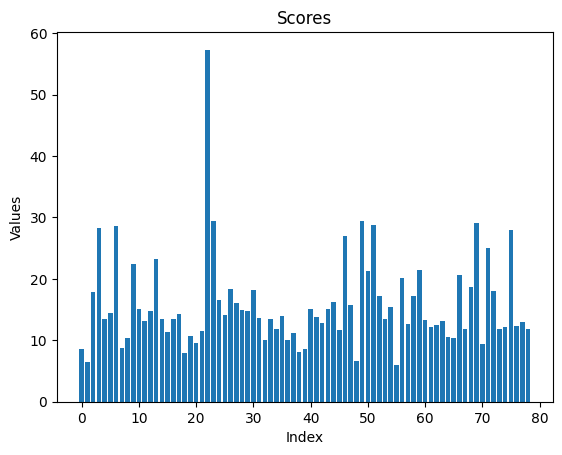

In [ ]:
ans = []

for t in tqdm(list(df["Text"])):

    try:

        r = Readability(t)
        fk = r.flesch_kincaid()


        ans.append(fk.score)

    except Exception as e:

        continue


print(f"Standard Deviation: {np.std(ans)}")
print(f"Mean: {np.mean(ans)}")
print(f"Median: {np.median(ans)}")
print(f"Length: {len(ans)}")
plot_bar_array(ans)

100%|██████████| 93/93 [00:01<00:00, 67.37it/s]


Standard Deviation: 7.539806009000411
Mean: 16.38643354208602
Median: 15.152111850620425
Length: 90


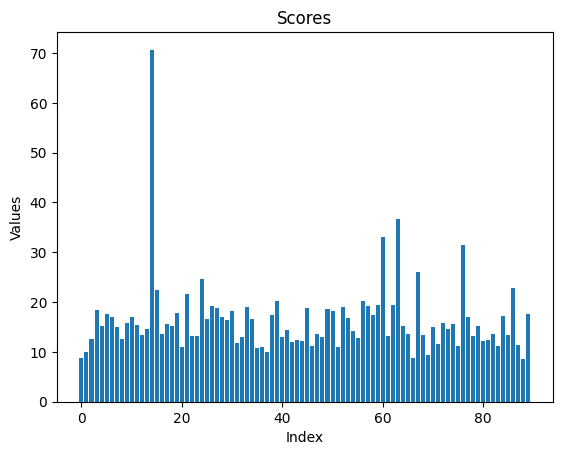

In [ ]:
ans = []

for t in tqdm(list(df["R_Text"])):

    try:

        r = Readability(t)
        fk = r.flesch_kincaid()


        ans.append(fk.score)

    except Exception as e:

        continue


print(f"Standard Deviation: {np.std(ans)}")
print(f"Mean: {np.mean(ans)}")
print(f"Median: {np.median(ans)}")
print(f"Length: {len(ans)}")
plot_bar_array(ans)

100%|██████████| 93/93 [00:00<00:00, 126.38it/s]


Standard Deviation: 3.295826177983834
Mean: 14.028199133679694
Median: 13.068900580551524
Length: 58


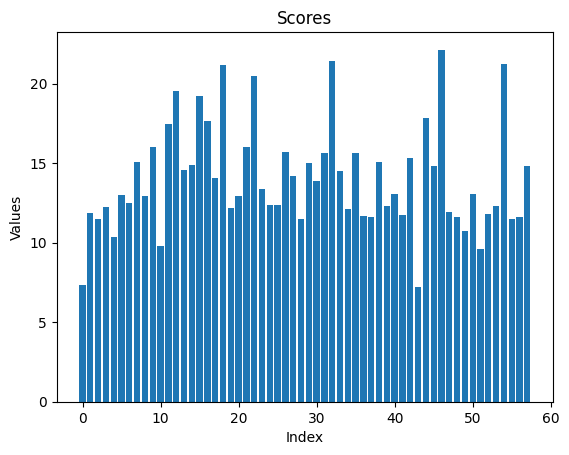

In [ ]:
ans = []

for t in tqdm(list(df["S_Text"])):

    try:

        r = Readability(t)
        fk = r.flesch_kincaid()


        ans.append(fk.score)

    except Exception as e:

        continue


print(f"Standard Deviation: {np.std(ans)}")
print(f"Mean: {np.mean(ans)}")
print(f"Median: {np.median(ans)}")
print(f"Length: {len(ans)}")
plot_bar_array(ans)